# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [2]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Sample narrative description.

The possible explanation to why the columns for make, model, trim, body, transmission, condition, odometer, colour, and interior have null values could be that the information for these specific cars was not available at the time of data collection. Information may be missing due to a variety of factors, including incorrect data entry, an insufficient data source, or the information may simply not have been recorded for some cars. The presence of missing values can significantly impact the accuracy and validity of the data analysis, so it's important to address this before proceeding with any analysis.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [3]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

In [4]:
#verifying the string values present in the column
from collections import Counter
lis1 = df['mmr'].str.extract(r'(\D+)',expand = False)
counts=Counter(lis1)
print(counts)

Counter({nan: 558811, 'sixt rent a car llc': 6, 'enterprise veh exchange/rental': 5, 'enterprise vehicle exchange / tra / rental / tulsa': 4, 'vw credit prequalified': 2, 'enterprise vehicle exchange / tra / birmingham': 2, 'tdaf remarketing': 1, 'premium auto wholesale': 1, 'affordable autos inc': 1, 'florida auto financial group': 1, 'hertz/tra': 1, 'enterprise-tra': 1, 'mid city mcandrew motors': 1})


###### It has far less character values compared to the numeric values present in the column hence we can use errors as coerce in the below line

In [5]:
df['mmr']=pd.to_numeric(df.mmr,errors='coerce')

In [6]:
df.saledate = pd.to_datetime(df.saledate, errors = 'coerce')

In [7]:
#verifying the string values present in the column
from collections import Counter
lis1 = df['condition'].str.extract(r'(\D+)',expand = False)
counts=Counter(lis1)
print(counts)     

Counter({'.': 476916, nan: 81895, 'fl': 7, 'ca': 4, 'ga': 3, 'ms': 2, 'pa': 2, 'va': 2, 'oh': 1, 'co': 1, 'sc': 1, 'in': 1, 'wi': 1, 'tx': 1})


These are all invalid values that cannot be considered for future analysis. Hence its better if we convert this to float as well.

In [8]:
df['condition'] = pd.to_numeric(df.condition,errors='coerce')

In [9]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500,2014-12-16 12:30:00+08:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500,2014-12-16 12:30:00+08:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000,2015-01-15 04:30:00+08:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750,2015-01-29 04:30:00+08:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000,2014-12-18 12:30:00+08:00


Sample narrative description.

To avoid communication mistakes we can opt for ISO standard format using datetime module for no ambiguity.So datetime is used to format saledate. Despite having some character values for "mmr," they are significantly outnumbered by the total number of values, hence it would be advantageous to convert it to float format.
Basically, I assumed that an object column contained all strings. In reality, an object column can contain a mixture of multiple types. Some of the values are floats, some are integers and some are strings. Overall, the column dtype is an object.With this discrepancy present, you can not do any string operation on the column straightaway.Moreover, having dtype as Object will make it less clear to work with just text and exclude the non-text values.
Therefore, it would be preferable if the "condition" column were transformed to a float for purposes of additional analysis, such as ranking automobiles.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [10]:
## This gives the length of the make column before any modifications
len(df['make'].unique())

97

In [11]:
sorted([str(i) for i in df['make'].unique()])

['Acura',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Daewoo',
 'Dodge',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'GMC',
 'Geo',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MINI',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Ram',
 'Rolls-Royce',
 'Saab',
 'Saturn',
 'Scion',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'acura',
 'airstream',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'dodge',
 'dodge tk',
 'dot',
 'ford',
 'ford tk',
 'ford truck',
 'gmc',
 'gmc truck',
 'honda',
 'hyundai',
 'hyundai tk',
 'jeep',
 'kia',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercury',
 'mitsubishi',
 'nan',
 'nissan

In [12]:
df['make'] = df['make'].str.lower()

In [13]:
len(df['make'].unique())

67

Sample narrative description.

The names are identical(perhaps duplicates), with some appearing in uppercase and others in lowercase. Now, we can see that there are 67 unique values instead of 97 in the make column once all the values are converted to lowercase

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [14]:
corr = df['mmr'].corr(df['sellingprice'])
print(f"Correlation between mmr and sellingprice is: ", round(corr, 2))

Correlation between mmr and sellingprice is:  0.98


In [15]:
max_sp_window=[(0,10000),(0,20000),(0, 30000), (0, 40000), (0, 50000), (0, 60000), (0, 70000), (0, 80000), (0, 90000), 
               (0, 100000), (0, 110000), (0, 120000), (0, 130000), (0, 140000), (0, 150000), (0, 160000), (0, 170000), 
               (0, 180000), (0, 190000), (0, 200000), (0, 210000), (0, 220000), (0, 230000)]
results = []

for p in max_sp_window:
    start,end = p
    limit_df=df[(df['sellingprice']>=start) & (df['sellingprice']<=end)]
    corr = limit_df['mmr'].corr(limit_df['sellingprice'])
    results.append({"price_range": p, "correlation": corr})
    print('The correlation between MMR and selling price in the range of {} - {} is: {}'.format(start, end, corr))

The correlation between MMR and selling price in the range of 0 - 10000 is: 0.874354272124959
The correlation between MMR and selling price in the range of 0 - 20000 is: 0.9584428323123206
The correlation between MMR and selling price in the range of 0 - 30000 is: 0.9744203460442996
The correlation between MMR and selling price in the range of 0 - 40000 is: 0.9791682459086513
The correlation between MMR and selling price in the range of 0 - 50000 is: 0.9812713466602431
The correlation between MMR and selling price in the range of 0 - 60000 is: 0.9822401960311035
The correlation between MMR and selling price in the range of 0 - 70000 is: 0.9827082643538264
The correlation between MMR and selling price in the range of 0 - 80000 is: 0.9831862576819893
The correlation between MMR and selling price in the range of 0 - 90000 is: 0.9834269274590417
The correlation between MMR and selling price in the range of 0 - 100000 is: 0.983576112833006
The correlation between MMR and selling price in th

As we can see, correlation increases with increase in maximum selling price window.

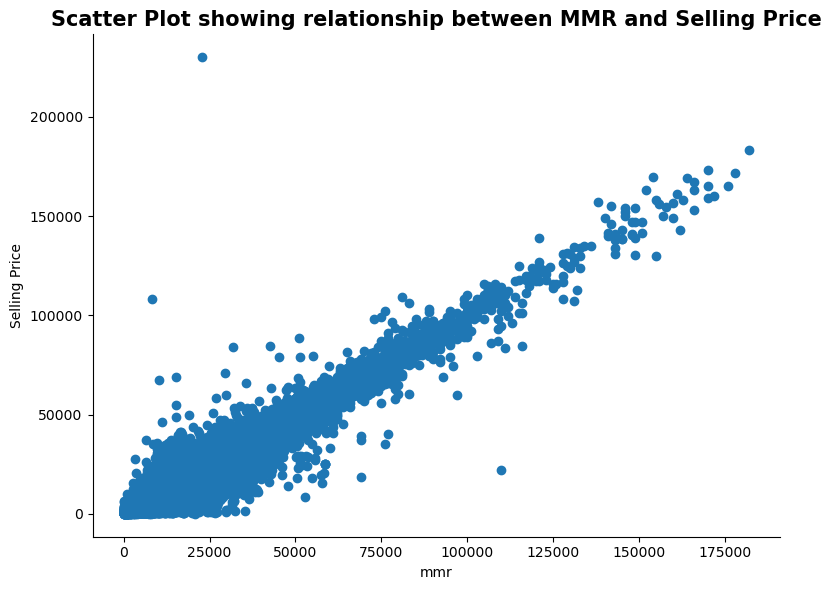

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['mmr'], df['sellingprice'])
plt.xlabel("mmr")
plt.ylabel("Selling Price")
plt.title("Scatter Plot showing relationship between MMR and Selling Price",fontsize=15,fontweight='bold')
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

<Figure size 1200x600 with 0 Axes>

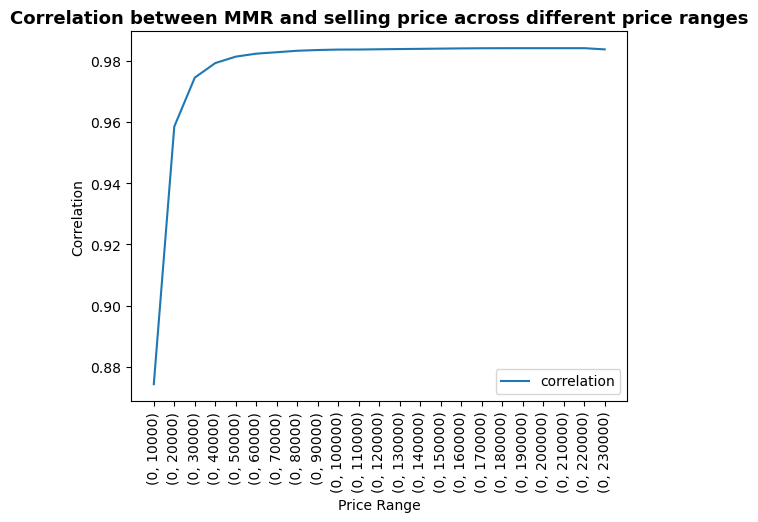

In [17]:
data = pd.DataFrame(results)
plt.figure(figsize=(12,6))
data.plot(x='price_range', y='correlation', kind='line')
plt.title("Correlation between MMR and selling price across different price ranges",fontsize=13,fontweight='bold')
plt.xlabel("Price Range")
plt.ylabel("Correlation")
plt.xticks(np.arange(0, 23), max_sp_window, rotation=90)
plt.show()

Sample narrative description.

Correlation coefficient is a measure that determines that degrre to which two values are associated. Anythings greater than 0, indicates a positive correlation. Since the value is almost equal to one it indicates that they both have a stronger linear relationship.
Also as we increase the maximum selling price window, the correlation coefficient kept increasing towards 1.

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [18]:
df.make.value_counts().head(10)

ford         93997
chevrolet    60587
nissan       54017
toyota       39966
dodge        30955
honda        27351
hyundai      21836
bmw          20793
kia          18084
chrysler     17485
Name: make, dtype: int64

In [19]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500,2014-12-16 12:30:00+08:00
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500,2014-12-16 12:30:00+08:00
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000,2015-01-15 04:30:00+08:00
3,2015,volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750,2015-01-29 04:30:00+08:00
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000,2014-12-18 12:30:00+08:00


In [20]:
# To include distribution for cars made between 2010-2015
df_years_1015 = df[(df['year'] >= 2010) & (df['year'] <= 2015)]

In [21]:
# Extracting 10 most common makes
common_makes = df_years_1015['make'].value_counts().head(10).index

In [22]:
# Filter the dataframe to include most 10 common makes only for the years 2010-2015
df_years1015_10makes = df_years_1015[df_years_1015['make'].isin(common_makes)]

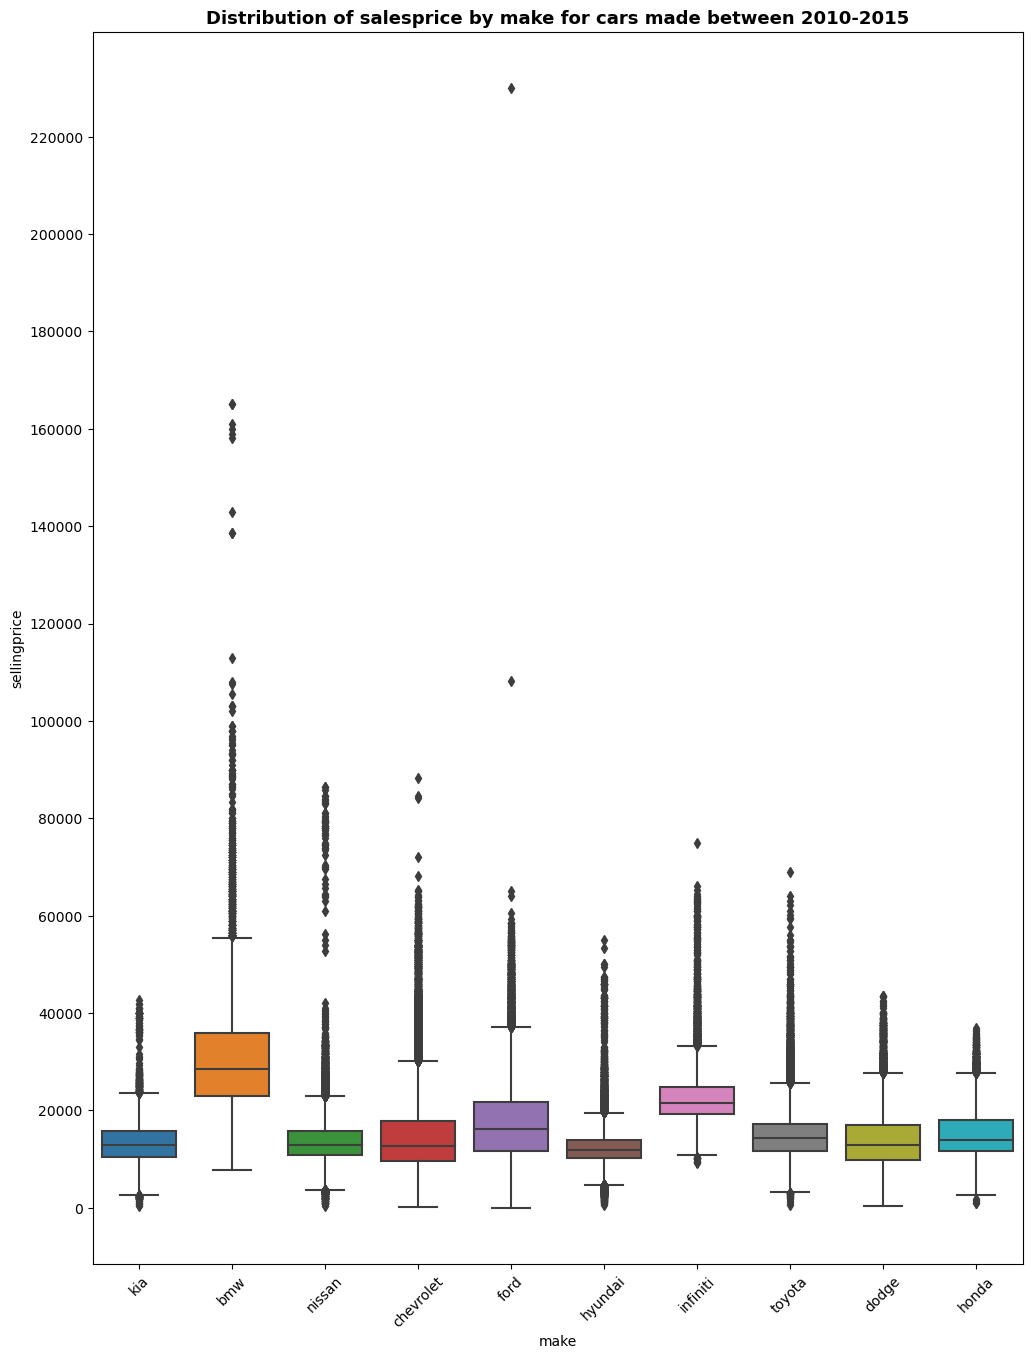

In [23]:
plt.figure(figsize=(12,16))
sns.boxplot(x='make', y='sellingprice', data=df_years1015_10makes)
plt.title("Distribution of salesprice by make for cars made between 2010-2015",fontsize=13,fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,240000,20000))

plt.show()

Sample narrative description.

*   From 2010 to 2015, Hyundai's selling price was lower than that of other automakers. 
*   When compared to other auto manufacturers, the median line for selling price at BMW is high
*   When we observe the above box plot, We can see that nissan,hyundai and toyota have normal distribution when compared to 
    other car makers.
*   We can see that, bmw has more dispersed data that can be drawn from its interquartile range